In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt

In [97]:
hr = pd.read_csv('D:\OSSI\Whitepapers\Cloud_Learning\Visualization_Cloud_Service\Analysis_Examples\Kaggle_HR_Dataset\core_dataset.csv')
hr.columns = ['Name','EmpNum','State','Zip','Date_of_birth','Age','Sex','MaritalDesc','CitizenDesc','Hispanic/Latino','RaceDesc','Date_of_Hire','Date_of_Termination','Reason_For_Termination','Employment_Status','Department','Position','Pay_Rate','Manager_Name','Employment_Source','Performance_Score']
hr = hr.drop(hr.index[301])

In [98]:
print(hr)

                      Name        EmpNum State      Zip Date_of_birth   Age  \
0               Brown, Mia  1.103024e+09    MA   1450.0    11/24/1985  32.0   
1     LaRotonda, William    1.106027e+09    MA   1460.0     4/26/1984  33.0   
2         Steans, Tyrone    1.302053e+09    MA   2703.0      9/1/1986  31.0   
3          Howard, Estelle  1.211051e+09    MA   2170.0     9/16/1985  32.0   
4              Singh, Nan   1.307060e+09    MA   2330.0     5/19/1988  29.0   
5         Smith, Leigh Ann  7.110077e+08    MA   1844.0     6/14/1987  30.0   
6      LeBlanc, Brandon  R  1.102024e+09    MA   1460.0     6/10/1984  33.0   
7              Quinn, Sean  1.206043e+09    MA   2045.0     11/6/1984  33.0   
8        Boutwell, Bonalyn  1.307060e+09    MA   2468.0      4/4/1987  30.0   
9        Foster-Baker, Amy  1.201031e+09    MA   2050.0     4/16/1979  38.0   
10             King, Janet  1.001495e+09    MA   1902.0     9/21/1954  63.0   
11        Zamora, Jennifer  1.112031e+09    MA   206

In [99]:
print(hr.columns)

Index(['Name', 'EmpNum', 'State', 'Zip', 'Date_of_birth', 'Age', 'Sex',
       'MaritalDesc', 'CitizenDesc', 'Hispanic/Latino', 'RaceDesc',
       'Date_of_Hire', 'Date_of_Termination', 'Reason_For_Termination',
       'Employment_Status', 'Department', 'Position', 'Pay_Rate',
       'Manager_Name', 'Employment_Source', 'Performance_Score'],
      dtype='object')


In [100]:
hr_no_dot = hr.drop('Date_of_Termination',axis=1)

In [107]:
PerformanceScore_dict = {'N/A- too early to review': 3,
                        'Needs Improvement': 2,
                        'Fully Meets': 3,
                        '90-day meets': 3,
                        'Exceeds': 4,
                        'Exceptional': 5,
                        'PIP': 1}
hr_no_dot['Performance_Score_Num'] = hr_no_dot['Performance_Score'].replace(PerformanceScore_dict)
print(hr_no_dot)

                      Name        EmpNum State      Zip Date_of_birth   Age  \
0               Brown, Mia  1.103024e+09    MA   1450.0    11/24/1985  32.0   
1     LaRotonda, William    1.106027e+09    MA   1460.0     4/26/1984  33.0   
2         Steans, Tyrone    1.302053e+09    MA   2703.0      9/1/1986  31.0   
3          Howard, Estelle  1.211051e+09    MA   2170.0     9/16/1985  32.0   
4              Singh, Nan   1.307060e+09    MA   2330.0     5/19/1988  29.0   
5         Smith, Leigh Ann  7.110077e+08    MA   1844.0     6/14/1987  30.0   
6      LeBlanc, Brandon  R  1.102024e+09    MA   1460.0     6/10/1984  33.0   
7              Quinn, Sean  1.206043e+09    MA   2045.0     11/6/1984  33.0   
8        Boutwell, Bonalyn  1.307060e+09    MA   2468.0      4/4/1987  30.0   
9        Foster-Baker, Amy  1.201031e+09    MA   2050.0     4/16/1979  38.0   
10             King, Janet  1.001495e+09    MA   1902.0     9/21/1954  63.0   
11        Zamora, Jennifer  1.112031e+09    MA   206

In [110]:
perf_race = hr_no_dot.set_index(['RaceDesc']).drop(['EmpNum','Zip','Age','Pay_Rate'],axis=1).groupby(['RaceDesc']).mean()
print(perf_race)
perf_race1 = perf_race.reset_index()
print(perf_race1)

                                  Performance_Score_Num
RaceDesc                                               
American Indian or Alaska Native               3.500000
Asian                                          3.064516
Black or African American                      2.981481
Hispanic                                       2.750000
Two or more races                              3.000000
White                                          3.057895
                           RaceDesc  Performance_Score_Num
0  American Indian or Alaska Native               3.500000
1                             Asian               3.064516
2         Black or African American               2.981481
3                          Hispanic               2.750000
4                 Two or more races               3.000000
5                             White               3.057895


## Employee race-wise performance visualization

<BarContainer object of 6 artists>

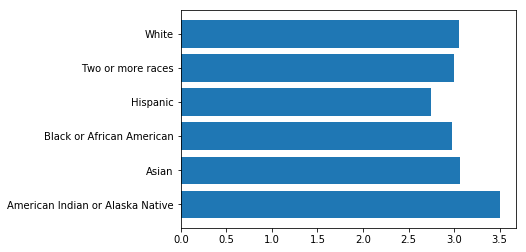

In [111]:
x = perf_race1['Performance_Score_Num']
y = perf_race1['RaceDesc']
pt.figure
pt.barh(y,x)

In [112]:
perf_empl_src = hr_no_dot.set_index(['Employment_Source']).drop(['EmpNum','Zip','Age','Pay_Rate'],axis=1).groupby(['Employment_Source']).mean()
print(perf_empl_src)
perf_empl_src1 = perf_empl_src.reset_index()
print(perf_empl_src1)

                                        Performance_Score_Num
Employment_Source                                            
Billboard                                            3.000000
Careerbuilder                                        3.000000
Company Intranet - Partner                           3.000000
Diversity Job Fair                                   3.068966
Employee Referral                                    3.258065
Glassdoor                                            3.000000
Information Session                                  3.250000
Internet Search                                      2.833333
MBTA ads                                             3.176471
Monster.com                                          2.958333
Newspager/Magazine                                   3.000000
On-campus Recruiting                                 3.083333
On-line Web application                              3.000000
Other                                                3.111111
Pay Per 

## Employment source-wise performance visualization

<BarContainer object of 22 artists>

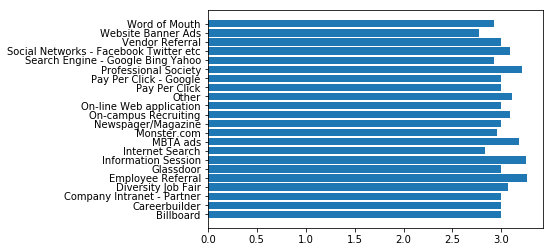

In [113]:
x = perf_empl_src1['Performance_Score_Num']
y = perf_empl_src1['Employment_Source']
pt.figure
pt.barh(y,x)

In [115]:
perf_dept = hr_no_dot.set_index(['Department']).drop(['EmpNum','Zip','Age','Pay_Rate'],axis=1).groupby(['Department']).mean()
print(perf_dept)
perf_dept1 = perf_dept.reset_index()
print(perf_dept1)

                           Performance_Score_Num
Department                                      
Admin Offices                           3.000000
Executive Office                        3.000000
IT/IS                                   3.219512
Production                              3.028846
Sales                                   2.870968
Software Engineering                    3.222222
Software Engineering                    3.000000
                  Department  Performance_Score_Num
0              Admin Offices               3.000000
1           Executive Office               3.000000
2                      IT/IS               3.219512
3          Production                      3.028846
4                      Sales               2.870968
5       Software Engineering               3.222222
6  Software Engineering                    3.000000


## Department-wise performance visualization

<BarContainer object of 7 artists>

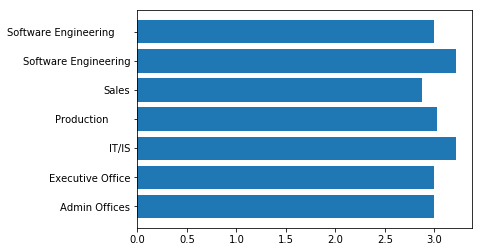

In [117]:
x = perf_dept1['Performance_Score_Num']
y = perf_dept1['Department']
pt.figure
pt.barh(y,x)

In [118]:
pay_race = hr_no_dot.set_index(['RaceDesc']).drop(['EmpNum','Zip','Age','Performance_Score_Num'],axis=1).groupby(['RaceDesc']).mean()
print(pay_race)
pay_race1 = pay_race.reset_index()
print(pay_race1)

                                   Pay_Rate
RaceDesc                                   
American Indian or Alaska Native  30.375000
Asian                             29.440645
Black or African American         34.624630
Hispanic                          39.750000
Two or more races                 31.264444
White                             29.577053
                           RaceDesc   Pay_Rate
0  American Indian or Alaska Native  30.375000
1                             Asian  29.440645
2         Black or African American  34.624630
3                          Hispanic  39.750000
4                 Two or more races  31.264444
5                             White  29.577053


## Race-wise pay rate visualization

<BarContainer object of 6 artists>

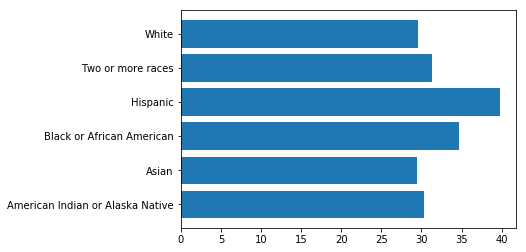

In [119]:
x = pay_race1['Pay_Rate']
y = pay_race1['RaceDesc']
pt.figure
pt.barh(y,x)

In [120]:
pay_dept = hr_no_dot.set_index(['Department']).drop(['EmpNum','Zip','Age','Performance_Score_Num'],axis=1).groupby(['Department']).mean()
print(pay_dept)
pay_dept1 = pay_dept.reset_index()
print(pay_dept1)

                            Pay_Rate
Department                          
Admin Offices              31.896000
Executive Office           80.000000
IT/IS                      44.792195
Production                 23.086298
Sales                      55.524194
Software Engineering       51.072222
Software Engineering       27.000000
                  Department   Pay_Rate
0              Admin Offices  31.896000
1           Executive Office  80.000000
2                      IT/IS  44.792195
3          Production         23.086298
4                      Sales  55.524194
5       Software Engineering  51.072222
6  Software Engineering       27.000000


## Department-wise pay rate visualization

<BarContainer object of 7 artists>

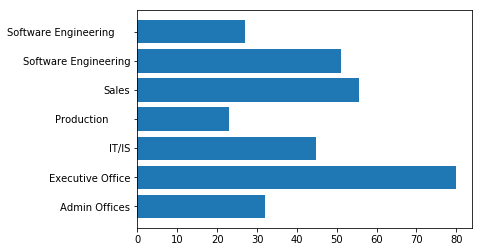

In [121]:
x = pay_dept1['Pay_Rate']
y = pay_dept1['Department']
pt.figure
pt.barh(y,x)

In [122]:
pay_pos = hr_no_dot.set_index(['Position']).drop(['EmpNum','Zip','Age','Performance_Score_Num'],axis=1).groupby(['Position']).mean()
print(pay_pos)
pay_pos1 = pay_pos.reset_index()
print(pay_pos1)

                               Pay_Rate
Position                               
Accountant I                  26.833333
Administrative Assistant      19.520000
Area Sales Manager            55.222222
CIO                           65.000000
Database Administrator        39.476923
Director of Operations        60.000000
Director of Sales             60.000000
IT Director                   65.000000
IT Manager - DB               41.500000
IT Manager - Infra            63.000000
IT Manager - Support          64.000000
IT Support                    28.470000
Network Engineer              39.677778
President & CEO               80.000000
Production Manager            49.678571
Production Technician I       19.104485
Production Technician II      25.407719
Sales Manager                 56.750000
Shared Services Manager       55.000000
Software Engineer             51.072222
Software Engineering Manager  27.000000
Sr. Accountant                34.950000
Sr. DBA                       60.000000


## Position-wise pay rate visualization

<BarContainer object of 24 artists>

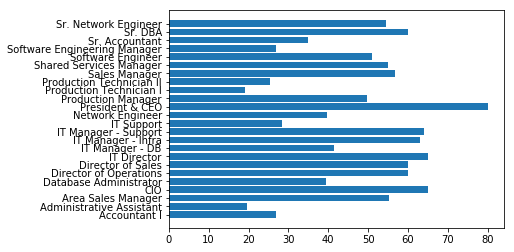

In [123]:
x = pay_pos1['Pay_Rate']
y = pay_pos1['Position']
pt.figure
pt.barh(y,x)

In [124]:
age_dept = hr_no_dot.set_index(['Department']).drop(['EmpNum','Zip','Pay_Rate','Performance_Score_Num'],axis=1).groupby(['Department']).mean()
print(age_dept)
age_dept1 = age_dept.reset_index()
print(age_dept1)

                                 Age
Department                          
Admin Offices              32.100000
Executive Office           63.000000
IT/IS                      37.804878
Production                 39.024038
Sales                      38.645161
Software Engineering       33.666667
Software Engineering       51.000000
                  Department        Age
0              Admin Offices  32.100000
1           Executive Office  63.000000
2                      IT/IS  37.804878
3          Production         39.024038
4                      Sales  38.645161
5       Software Engineering  33.666667
6  Software Engineering       51.000000


## Department-wise age visualization

<BarContainer object of 7 artists>

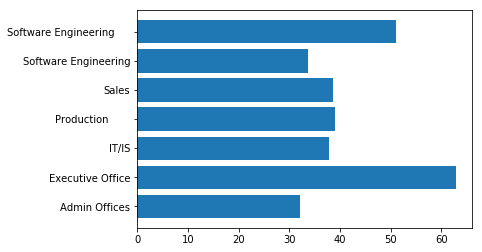

In [125]:
x = age_dept1['Age']
y = age_dept1['Department']
pt.figure
pt.barh(y,x)